Python & Colab intro

In [1]:
a = 10

In [2]:
print(a)

10


BMI counting code

In [4]:
height = 180
weight = 75
bmi = weight / pow((height / 100), 2)
print(bmi)

23.148148148148145


In [9]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
def bmi(height_in_centimeters, weight_in_kilograms):
  return weight_in_kilograms / ((height_in_centimeters / 100) ** 2)

print(bmi(170, 80))

27.68166089965398


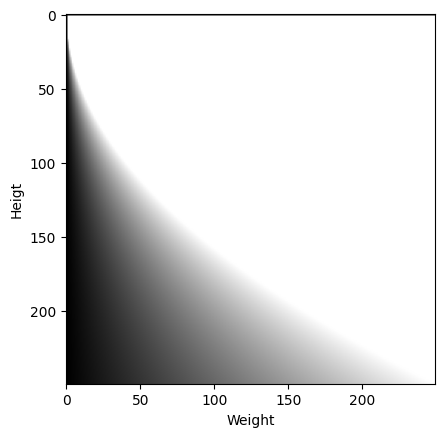

In [17]:
result = np.zeros([250, 250, 3])
for x in range(1, 250):
  for y in range(1, 250):
    if bmi(x, y) < 40:
      result[x][y] = bmi(x,y)
    else:
      result[x][y] = 40

# normalisation to achieve the range 0 - 1
result = (result - np.min(result)) / (np.max(result) - np.min(result))

plt.xlabel("Weight")
plt.ylabel("Heigt")
plt.imshow(result)

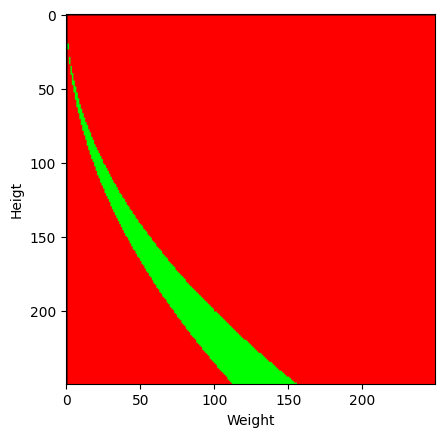

In [18]:
result = np.zeros([250, 250, 3])
for x in range(1, 250):
  for y in range(1, 250):
    if bmi(x, y) > 18 and bmi(x, y) < 25:
      result[x][y] = [0, 1, 0]
    else:
      result[x][y] = [1, 0, 0]

# normalisation to achieve the range 0 - 1
result = (result - np.min(result)) / (np.max(result) - np.min(result))

plt.xlabel("Weight")
plt.ylabel("Heigt")
plt.imshow(result)

Prediction

In [19]:
data_1 = np.array([[160,54,1],[170,60,1],[165,70,1],[190,120,0],[203,88,0],[192,78,0],[163,74,1],[177,43,1],[175,62,1],[195,110,0],[205,90,0],[197,78,0],[165,64,1],[178,50,1],[185,71,1],[188,105,0],[200,85,0],[199,83,0],[169,59,1],[180,66,1],[169,75,1],[171,103,0 ],[199,80,0],[188,85,0]])
data_2 = np.array([[60,54,1],[170,60,1],[165,70,1],[190,120,0],[203,88,0],[192,78,0],[163,74,1],[77,43,0],[175,62,1],[195,110,1],[205,90,0],[97,78,0],[165,64,1],[178,50,1],[85,71,0],[188,105,0],[100,85,1],[199, 83,0],[169,59,1],[180,66,1], [169,75,1], [71,103,0], [199,80,0], [88,85,1]])

In [20]:
def show_points(data):
  for x, y, c in data:
    if c == 0:
      plt.plot(x, y, marker = 'o', color = 'red')
    else:
      plt.plot(x, y, marker = 'o', color = 'green')

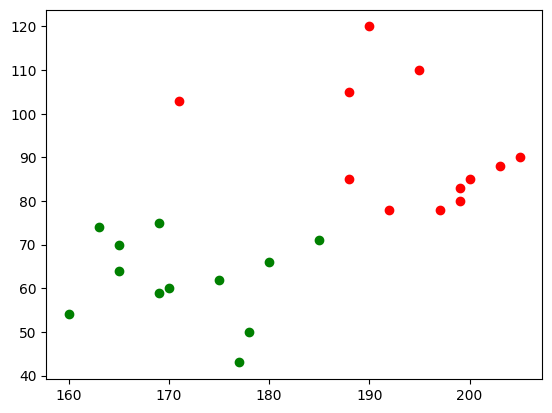

In [21]:
show_points(data_1)

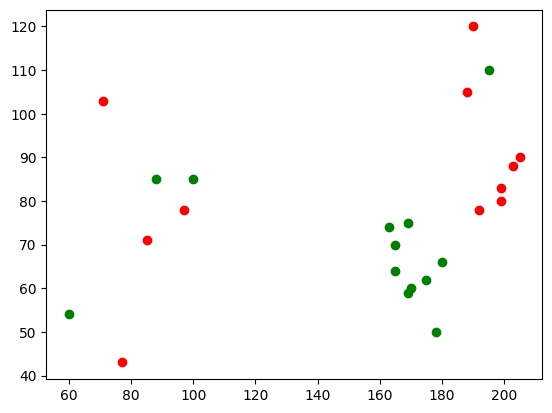

In [22]:
show_points(data_2)

Building predicting model

In [32]:
def classify_all_points(model, max = 250):
  # create all pairs (x,y) in range 0-max
  samples = []
  for x in range(max):
    for y in range(max):
      samples.append((x, y))
  samples = np.array(samples)

  # use the model for classification of all pairs
  r = model.predict(samples)

  # create image witch all pairs (value > 0,5 - green, value <= 0.5 - red)
  result = np.zeros([max, max, 3])
  for i in range(len(samples)):
    if r[i] > 0.5:
      result[samples[i, 1], samples[i, 0]] = [0, 0.2, 0]
    else:
      result[samples[i, 1], samples[i, 0]] = [0.2, 0, 0]

  return result

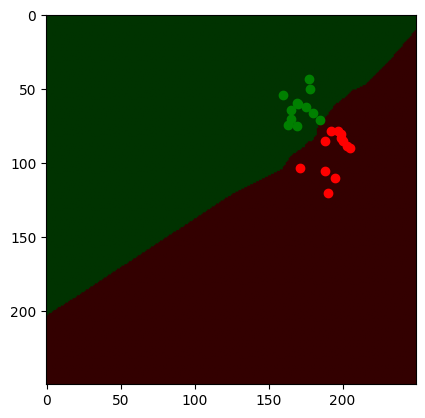

In [37]:
model = KNeighborsClassifier() # DecisionTreeClassifier()
samples = data_1[:, 0:2]
labels = data_1[:, 2]
model.fit(samples, labels)

result = classify_all_points(model)
plt.imshow(result)
show_points(data_1)

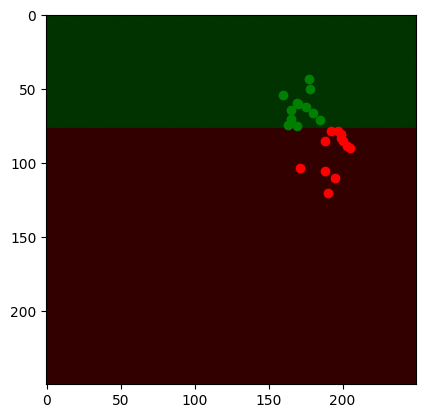

In [38]:
model = DecisionTreeClassifier()
samples = data_1[:, 0:2]
labels = data_1[:, 2]
model.fit(samples, labels)

result = classify_all_points(model)
plt.imshow(result)
show_points(data_1)

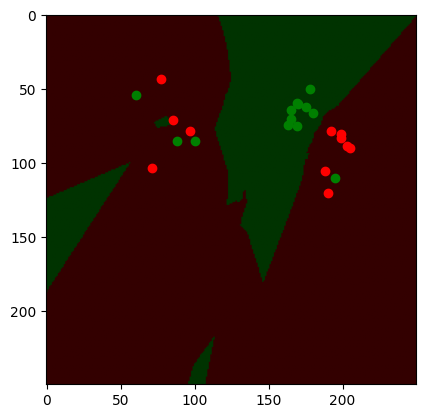

In [39]:
model = KNeighborsClassifier() # DecisionTreeClassifier()
samples = data_2[:, 0:2]
labels = data_2[:, 2]
model.fit(samples, labels)

result = classify_all_points(model)
plt.imshow(result)
show_points(data_2)

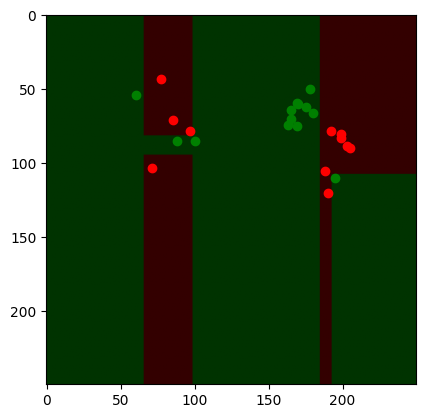

In [40]:
model = DecisionTreeClassifier()
samples = data_2[:, 0:2]
labels = data_2[:, 2]
model.fit(samples, labels)

result = classify_all_points(model)
plt.imshow(result)
show_points(data_2)

Using neuronal network

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_dim = 2, activation = 'sigmoid'))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                192       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4417 (17.25 KB)
Trainable params: 4417 (17.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1954/1954 [==============================] - 3s 1ms/step


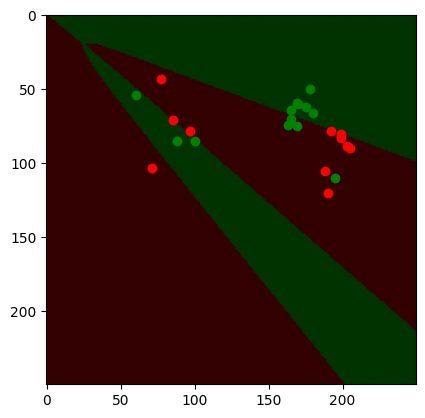

In [45]:
samples = data_2[:, 0:2]
labels = data_2[:, 2]
model.fit(samples, labels, epochs = 200, verbose = 0)

result = classify_all_points(model)
plt.imshow(result)
show_points(data_2)